In [1]:
from wordle_modeller import wordle_solver, formatgametohtml

import seaborn as sns
import matplotlib.pyplot as plt # for data visualization

import pandas as pd
import numpy as np

from IPython.core.display import display, HTML

sns.set_theme(style="darkgrid")
sns.color_palette()
sns.despine()

<Figure size 432x288 with 0 Axes>

In [2]:
#There are multiple choices available for dictionaries
g = wordle_solver(dict_file = 'wordle_words.txt')
#g = wordle_solver(dict_file = 'full_five_letters_words.txt')

Loaded dictionary with 2315 words


### Let's start with some basic analysis

In [3]:
f = g.analyse_frequency()
df1 = pd.DataFrame.from_dict(f, orient='index', columns=['frequency'])
df1.index.name = 'letter'
df1.sort_values(by=['frequency'], ascending=False)

,frequency
letter,
E,1233
A,979
R,899
O,754
T,729
L,719
I,671
S,669
N,575


<AxesSubplot:title={'center':'Frequency of letters in the larger dataset (3450 words)'}, xlabel='letter'>

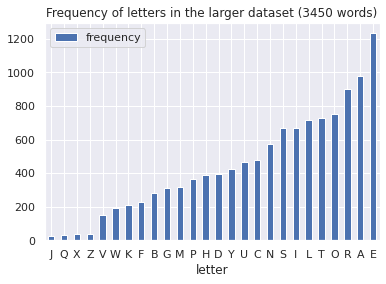

In [4]:
df1.plot(kind="bar", rot=0, title='Frequency of letters in the wordle database')#, color='#a51d2dff')

In [5]:
g.frequency_rank(limit=50)

['LATER',
 'ALTER',
 'ALERT',
 'AROSE',
 'IRATE',
 'STARE',
 'ARISE',
 'RAISE',
 'LEARN',
 'RENAL',
 'SNARE',
 'SANER',
 'STALE',
 'SLATE',
 'STEAL',
 'LEAST',
 'REACT',
 'CRATE',
 'TRACE',
 'CATER',
 'CLEAR',
 'STORE',
 'LOSER',
 'AISLE',
 'ATONE',
 'TEARY',
 'ALONE',
 'ADORE',
 'SCARE',
 'LAYER',
 'RELAY',
 'EARLY',
 'LEANT',
 'TREAD',
 'TRADE',
 'OPERA',
 'HEART',
 'HATER',
 'EARTH',
 'TAPER',
 'PALER',
 'PEARL',
 'TENOR',
 'ALIEN',
 'AIDER',
 'SHARE',
 'SHEAR',
 'CRANE',
 'TAMER',
 'GREAT']

In [6]:
for word in ['snare', 'sleep', 'slept', 'tomas']:
    print ( g.check_rank(word) )

{'SNARE': 70, 'total': 2315}
{'SLEEP': 132, 'total': 2315}
{'SLEPT': 580, 'total': 2315}
{'TOMAS': 'not found', 'total': 2315}


### To visualize a single game:

In [7]:
r = g.solve(use_smart=True, exclude=2)
#this visualization requires CSS and will not work on github
display(HTML(formatgametohtml(r['game'])))
#r['game']

### Let's start solving to compare strategies

In [8]:
#stupid mode - just random words with no rationale
r0 = g.solve_many(use_smart=False, stupid_mode=True, N_GAMES=100000, exclude=0)
r0['success_rate']

0.00252

In [78]:
#do you want to try performance on today's word? If yes, put it here. Otherwise for general performance set to None
guess_word = None

#do you want to try performance with a given starting word?
start_with = None

In [79]:
r1 = g.solve_many(guess_word=guess_word, start_with=start_with, use_smart=False, N_GAMES=1000, exclude=0)

In [80]:
r2 = g.solve_many(guess_word=guess_word, start_with=start_with, use_smart=True, N_GAMES=1000, exclude=0)

In [81]:
r3 = g.solve_many(guess_word=guess_word, start_with=start_with, use_smart=True, N_GAMES=1000, exclude=1)

In [82]:
r4 = g.solve_many(guess_word=guess_word, start_with=start_with, use_smart=True, N_GAMES=1000, exclude=2)

In [71]:
df1 = pd.DataFrame(data=r1['profile'])
df1.index.name = 'game'
df1.columns = ['success']
df1['use_smart'] = False
df1['exclude'] = 0
df1['strategy'] = 'No smart start, no exclusion'

In [72]:
df2 = pd.DataFrame(data=r2['profile'])
df2.index.name = 'game'
df2.columns = ['success']
df2['use_smart'] = True
df2['exclude'] = 0
df2['strategy'] = 'Smart start, no exclusion'

In [73]:
df3 = pd.DataFrame(data=r3['profile'])
df3.index.name = 'game'
df3.columns = ['success']
df3['use_smart'] = True
df3['exclude'] = 1
df3['strategy'] = 'Smart start, 1 exclusion'

In [74]:
df4 = pd.DataFrame(data=r4['profile'])
df4.index.name = 'game'
df4.columns = ['success']
df4['use_smart'] = True
df4['exclude'] = 2
df4['strategy'] = 'Smart start, 2 exclusions'

In [75]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,success,use_smart,exclude,strategy
0,4,False,0,"No smart start, no exclusion"
1,3,False,0,"No smart start, no exclusion"
2,4,False,0,"No smart start, no exclusion"
3,5,False,0,"No smart start, no exclusion"
4,6,False,0,"No smart start, no exclusion"
...,...,...,...,...
3995,6,True,2,"Smart start, 2 exclusions"
3996,5,True,2,"Smart start, 2 exclusions"
3997,5,True,2,"Smart start, 2 exclusions"
3998,5,True,2,"Smart start, 2 exclusions"


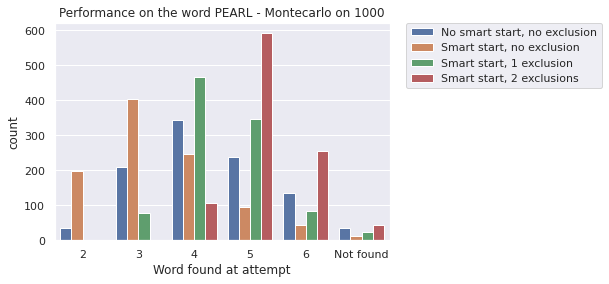

In [76]:
p = sns.countplot(data=df, x='success', hue='strategy')
p.set_xticklabels([2, 3, 4, 5, 6, 'Not found'])
p.set_xlabel("Word found at attempt")
p.set_title("Performance on the word PEARL - Montecarlo on 1000")

# Place the legend out of the figure
p.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [77]:
print ('success rate: ', r1['success_rate'], r2['success_rate'], r3['success_rate'], r4['success_rate'])
print ('average success attempt: ', np.mean( r1['profile']), np.mean( r2['profile']),np.mean( r2['profile']), np.mean( r3['profile']))

success rate:  0.964 0.987 0.977 0.955
average success attempt:  4.333 3.422 3.422 4.503


### To solve a game follow this protocol

In [3]:
#start word can be totally random
g.pick_random_word()

#or from the smart set
g.pick_smart_word()

'SANER'

In [4]:
g.pick_random_word(has_letters="AO", hasnot_letters="UDIcstLMJ", pattern="_A_OR")

'FAVOR'